<a href="https://colab.research.google.com/github/caplove/DX_team_4_repo/blob/main/Team_4_Augment_DNN_MLP_Tree_Knn_Ensemble2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 가져오기**

---



In [1]:
!git clone https://github.com/caplove/DX_team_4_repo.git

Cloning into 'DX_team_4_repo'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 152 (delta 64), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (152/152), 10.40 MiB | 5.71 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [2]:
#과제 설명
from IPython.display import Image
#Image('./image/image_01.png',width=800,height=600)

In [3]:
#Image('./image/image_02.jpg',width=800,height=700)

In [4]:
#Image('./image/image_03.jpg',width=800,height=700)

In [5]:
#Image('./image/image_05.jpg',width=800,height=700)

In [6]:
"""입출력"""
import os

"""전처리"""
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

from scipy.interpolate import CubicSpline      # for Data Augmentation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

"""시각화"""
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import seaborn as sns
#sns.set_style("white")
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore') 

## 데이터 프레임

In [7]:
# 하위 폴더내에 각각 파일이 있고, 파일(폴더)명에 class 정보가 있을경우 
# 참조 : https://wikidocs.net/39

df=[]
df = pd.DataFrame()


for (path, dir, files) in os.walk("./DX_team_4_repo/Data/"):
                
        for filename in files:
             ext = os.path.splitext(filename)[-1]  # 확장자가 txt 이면...
             if ext == '.txt':
       
                # 해당파일을 DataFrame으로 읽고 class 추가하기
                print(path + '/' + filename)

                data = pd.read_csv(path + '/'+filename,sep='[:, ,]',names=['ID','accx','accy','accz','gyrx','gyry','gyrz','current','NaN'],header=None,index_col=None)
                data = data.drop(['ID','NaN'],axis=1)     # 다수의 sep는 [ A구분자,B구분자 ] 사용
    
                #Class 컬럼추가 (파일명에서  . 앞에 문자열 추출
                class_name = filename.split('.')[0]     
                data.loc[:,'CLASS']=np.array([class_name]*len(data))    

                #모든 Class 데이터 누적 합치기
                df = pd.concat([df,data])

./DX_team_4_repo/Data//coat_4.txt
./DX_team_4_repo/Data//coat_3.txt
./DX_team_4_repo/Data//shirt_4.txt
./DX_team_4_repo/Data//suit_2.txt
./DX_team_4_repo/Data//coat_5.txt
./DX_team_4_repo/Data//coat_2.txt
./DX_team_4_repo/Data//shirt_1.txt
./DX_team_4_repo/Data//suit_3.txt
./DX_team_4_repo/Data//shirt_2.txt
./DX_team_4_repo/Data//coat_1.txt
./DX_team_4_repo/Data//shirt_5.txt
./DX_team_4_repo/Data//idle.txt
./DX_team_4_repo/Data//suit_5.txt
./DX_team_4_repo/Data//suit_4.txt
./DX_team_4_repo/Data//suit_1.txt
./DX_team_4_repo/Data//shirt_3.txt


In [8]:
df.head()

,accx,accy,accz,gyrx,gyry,gyrz,current,CLASS
0,-0.01,0.07,0.96,1.28,0.85,-1.46,1.33,coat_4
1,-0.02,0.00,0.94,1.83,1.04,-1.53,0.14,coat_4
2,0.01,0.02,1.06,-0.61,1.10,-1.53,-0.99,coat_4
3,0.02,0.02,1.03,-0.18,1.22,-1.53,0.01,coat_4
4,0.01,-0.05,1.01,1.89,1.04,-1.77,1.20,coat_4


In [9]:
df.tail()

,accx,accy,accz,gyrx,gyry,gyrz,current,CLASS
10474,0.01,-0.00,1.01,-0.55,0.92,-1.34,0.68,shirt_3
10475,0.07,-0.06,1.24,-0.92,1.22,-1.10,0.88,shirt_3
10476,-0.01,0.03,0.85,0.61,1.16,-1.22,0.27,shirt_3
10477,-0.00,-0.05,1.02,1.10,1.22,-1.22,-0.57,shirt_3
10478,-0.02,0.01,0.95,0.67,0.92,-1.22,-0.60,shirt_3


In [10]:
df.describe()

,accx,accy,accz,gyrx,gyry,gyrz,current
count,274582.000000,274582.000000,274582.000000,274582.000000,274582.000000,274582.000000,274582.000000
mean,-0.000210,-0.000524,0.998872,0.263806,1.062795,-1.314019,0.084912
std,0.018129,0.035233,0.059794,1.455410,0.179769,0.192238,0.619515
min,-0.180000,-0.190000,0.570000,-15.630000,0.060000,-2.140000,-3.630000
25%,-0.010000,-0.020000,0.970000,-0.550000,0.980000,-1.400000,-0.480000
50%,0.000000,0.000000,1.000000,0.240000,1.040000,-1.280000,0.070000
75%,0.010000,0.020000,1.030000,1.040000,1.160000,-1.220000,0.650000
max,0.140000,0.220000,1.440000,15.560000,2.320000,-0.430000,1.810000


## x,y 정의

In [11]:
""" 설명 변수 및 반응변수 구분 """
x = df.drop(['CLASS'],axis=1)
y = df['CLASS']

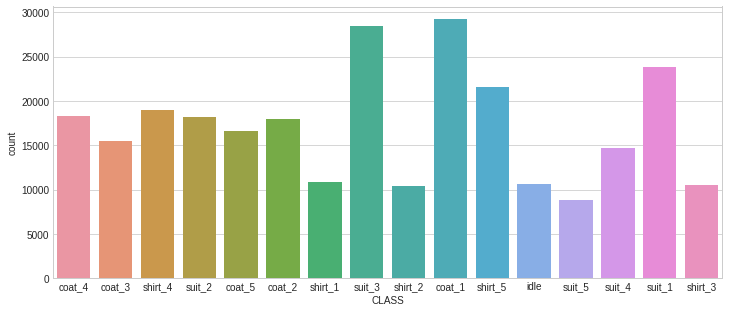

In [12]:
"""분포 확인"""
plt.figure(figsize=(12, 5))
sns.countplot(y)           # 돗수분포
plt.show()

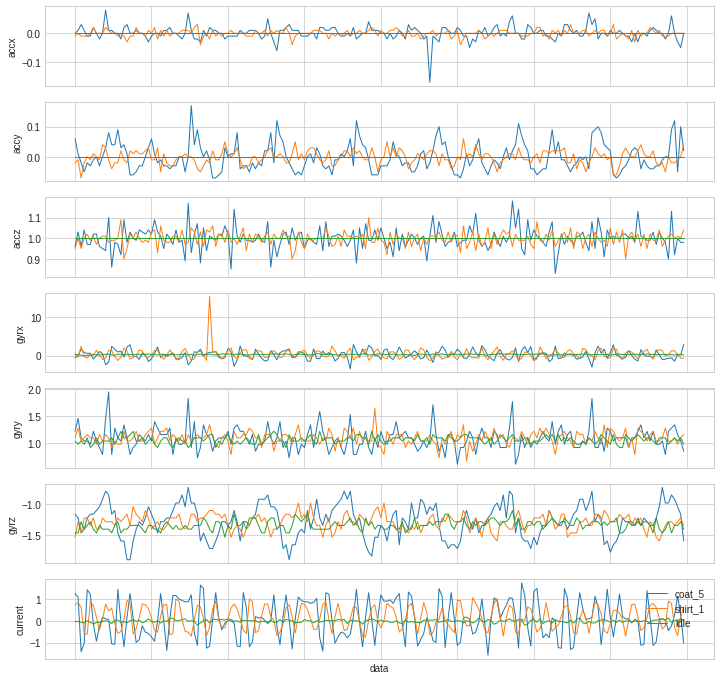

In [13]:
"""데이터 확인"""
# 몇 개의 Class에 대하여, 맨 앞 1초간 데이터 관찰

class_list=['coat_5','shirt_1','idle']
sensor_list=['accx','accy','accz','gyrx','gyry','gyrz','current']
data_length=200       # 2초  @ 10ms sampling

plt.figure(figsize=(12,12))

for i in class_list:
    idx_class = df[df.CLASS == i]

    for j in sensor_list:
        idx_j = sensor_list.index(j)    # j의 위치를 찾아 subplot의 위치를 정함.
        plt.subplot(7,1,idx_j+1)
        plt.plot(idx_class[j][0:data_length],label=i,linewidth=1)
        plt.ylabel(j)
        plt.xticks(visible=False)
    
plt.xlabel('data')
plt.legend(loc='upper right')
plt.show()

In [14]:
#Image('./image/image_06.jpg')

># 데이터 클린징

>>## Kalman Filter

In [15]:
# def kalman_filter(z_meas, x_esti, P):
#     """Kalman Filter Algorithm for One Variable."""
#     # (1) Prediction.
#     x_pred = A * x_esti
#     P_pred = A * P * A + Q

#     # (2) Kalman Gain.
#     K = P_pred * H / (H * P_pred * H + R)

#     # (3) Estimation.
#     x_esti = x_pred + K * (z_meas - H * x_pred)

#     # (4) Error Covariance.
#     P = P_pred - K * H * P_pred

#     return x_esti, P

In [16]:
# # Input parameters.
# time_end = 500
# dt = 1

In [17]:
# # Initialization for system model.
# A = 0.8   # 시간에 따라 상태 변환            Xk+1 = A*Xk + wk   (X: 예측값)
# H = 0.8   # 상태를 측정값으로 변환           Zk   = H*Xk + vx   (Z: 측정값)
# Q = 0.05   # 예측값의 분산
# R = 0.1  # 측정값의 분산
# # Initialization for estimation.
# x_0 = 0  # 14 for book.
# P_0 = 0.1

In [18]:
# time = np.arange(0, time_end, dt)
# n_samples = len(time)
# volt_meas_save = np.zeros(n_samples)
# volt_esti_save = np.zeros(n_samples)

In [19]:
# x_esti, P = None, None
# for i in range(n_samples):
#     z_meas = np.array(x['current'])[i+22000]
#     if i == 0:
#         x_esti, P = x_0, P_0
#     else:
#         x_esti, P = kalman_filter(z_meas, x_esti, P)

#     volt_meas_save[i] = z_meas
#     volt_esti_save[i] = x_esti

In [20]:
# plt.figure(figsize=(20,4))
# plt.plot(time, volt_meas_save, 'r*--', label='Measurements')
# plt.plot(time, volt_esti_save, 'bo-', label='Kalman Filter')
# plt.legend(loc='upper left')
# plt.title('Measurements v.s. Estimation (Kalman Filter)')
# plt.xlabel('Time[ms]')
# plt.ylabel('current[A]')
# #plt.savefig('png/simple_kalman_filter.png')

# **전처리**

---





>## Scaler
>> 가속센서/전류값 range 유사하여 미적용

In [21]:
"""전처리 / 데이터 증강 """
#Image('./image/image_08.jpg',width=800, height=400)
# jittering, Scaling, Rotation,Permutation,Magnitude Warping,TimeWarp,Cropping ... 

'전처리 / 데이터 증강 '

>## Data Augmentation


>>>### *jittering*

In [22]:
seed_no = 2022
np.random.seed(seed = seed_no)

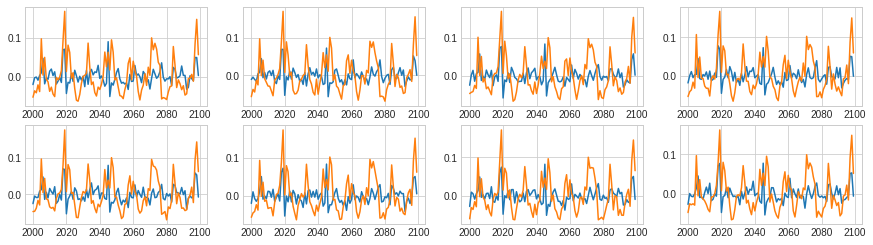

In [23]:
"""jittering"""
sigma = 0.005

def DA_Jitter(X, sigma=sigma):
    myNoise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    return X + myNoise

x_in_jittering = DA_Jitter(x,sigma)

# sample
#x_sample = x.loc[:,'accx':'accz']    # array에서 slicing  
x_sample = x.iloc[2000:2100,0:2]             # pd DataFrame에서 slicing은 .loc(인덱스기반) 또는 .iloc(위치기반) 써야함.
# print(x.shape,x_in.shape)

# x 전체 데이터에 jittering

fig = plt.figure(figsize=(15,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
    ax.plot(DA_Jitter(x_sample,sigma))

>>>### *Magnitude Warping*

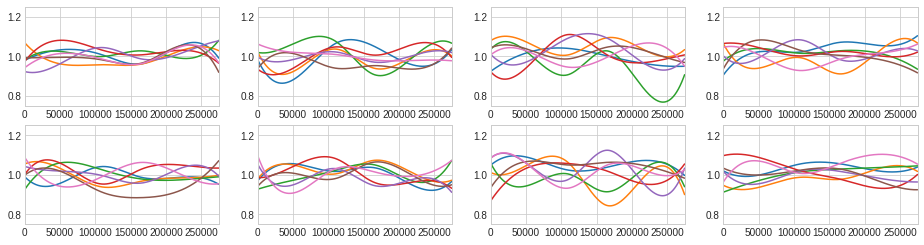

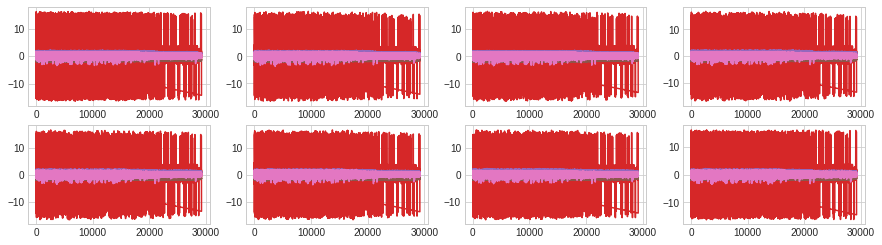

In [24]:
"""Magnitude Warping"""
sigma = 0.05  # default 0.2  (standard deviation)
knot = 4      # default 4    (should be integer)
#seed_no = 2022

## This example using cubic splice is not the best approach to generate random curves. 
## You can use other aprroaches, e.g., Gaussian process regression, Bezier curve, etc.
def GenerateRandomCurves(X, sigma=sigma, knot=4):
    #np.random.seed(seed = seed_no)
    xx = (np.ones((X.shape[1],1))*(np.arange(0,X.shape[0], (X.shape[0]-1)/(knot+1)))).transpose()
    yy = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, X.shape[1]))
    x_range = np.arange(X.shape[0])
    cs_x = CubicSpline(xx[:,0], yy[:,0])
    cs_y = CubicSpline(xx[:,1], yy[:,1])
    cs_z = CubicSpline(xx[:,2], yy[:,2])
    cs_a = CubicSpline(xx[:,3], yy[:,3])  # 추가
    cs_b = CubicSpline(xx[:,4], yy[:,4])  # 추가
    cs_c = CubicSpline(xx[:,5], yy[:,5])  # 추가
    cs_i = CubicSpline(xx[:,6], yy[:,6])  # 추가
    
    return np.array([cs_x(x_range),cs_y(x_range),cs_z(x_range),cs_a(x_range),cs_b(x_range),cs_c(x_range),cs_i(x_range)]).transpose()



## Random curves around 1.0
fig = plt.figure(figsize=(16,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
#    ax.plot(GenerateRandomCurves(x.iloc[:,0:3], sigma))
    ax.plot(GenerateRandomCurves(x, sigma, knot))

    plt.axis([0,x.shape[0],0.75,1.25])

def DA_MagWarp(X, sigma):
    return X * GenerateRandomCurves(X, sigma)

fig = plt.figure(figsize=(15,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
#    ax.plot(DA_MagWarp(x.iloc[:,0:3], sigma))
    ax.plot(DA_MagWarp(x,sigma))

    # ax.set_xlim([0,20000])
    # ax.set_ylim([-5,5])    
    

In [25]:
# x 전체 데이터에 Magnitude Warp
x_in_MagWarp = DA_MagWarp(x,sigma)

>>>### *Scaling*

In [26]:
"""Scaling"""
sigma = 0.025

def DA_Scaling(X, sigma=sigma):
    scalingFactor = np.random.normal(loc=1.0, scale=sigma, size=(1,X.shape[1])) # shape=(1,3)
    myNoise = np.matmul(np.ones((X.shape[0],1)), scalingFactor)
    return X*myNoise

x_in_Scaling = DA_Scaling(x,sigma)    

>>>### *Combination*

In [27]:
"""Combination"""
sigma1 = 0.1
sigma2 = 0.01

x_in_Combination = DA_Jitter(DA_Scaling(x,sigma1),sigma2)    

># Augmented SET 선정

In [28]:
"""Augmentation 결과 적용 list"""
# default
# x_list=[x]

# jittering / MagWarp
# x_list=[x, x_in_jittering, x_in_MagWarp]
# jittering / MagWarp / Scaling
# x_list=[x, x_in_jittering, x_in_MagWarp, x_in_Scaling]

# jittering / MagWarp / Scaling / Combination
x_list=[x, x_in_jittering, x_in_MagWarp, x_in_Scaling, x_in_Combination]
# print(x.shape, x_in_jittering.shape, x_in_MagWarp.shape, x_in_Scaling.shape, x_in_Combination.shape, y.shape)

# **특징추출**
---

>>## MFCC

In [29]:
"""전처리 / 특징 추출 """
"""MFCC"""
#Image('./image/image_09.jpg', width=400, height=100)   # https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=sooftware&logNo=221661644808

'MFCC'

In [30]:
"""library"""
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

"""변수정의"""
fs=100
no_of_data=400
class_list=np.array(['idle', 'suit_1','suit_2','suit_3','suit_4','suit_5','shirt_1','shirt_2','shirt_3',
            'shirt_4','shirt_5','coat_1','coat_2','coat_3','coat_4','coat_5'])

features_all=pd.DataFrame()

"""함수정의"""
# list 들어오면, n개씩 쪼개서 return   https://jsikim1.tistory.com/141
def list_chunk(lst,n):
    return [lst[i:i+n] for i in range(0,len(lst),n)], len(lst)//n      #  // 몫


In [31]:

#class_list=np.array(['coat_5','shirt_1'])
class_list=np.array(['idle', 'suit_1','suit_2','suit_3','suit_4','suit_5','shirt_1','shirt_2','shirt_3',
            'shirt_4','shirt_5','coat_1','coat_2','coat_3','coat_4','coat_5'])
features_all=pd.DataFrame()

for ii in x_list:
# 각 class별로 n개씩 묶어서(chunk) -->  mfcc -->  merge 함.

# chunk
    for i in class_list:       # class별로 'idle', 'suit1', ....
        idx_class = y == i
        x_in, count = list_chunk(ii['accx'][idx_class],no_of_data)   # x 400ea
        y_in, count = list_chunk(ii['accy'][idx_class],no_of_data)   # y 400ea
        z_in, count = list_chunk(ii['accz'][idx_class],no_of_data)   # z 400ea
        current_in, count = list_chunk(ii['current'][idx_class],no_of_data)   # current 400ea 
        class_in,count = list_chunk(y[idx_class],no_of_data)   # label
        print("class:", i, "    chunk개수:",count)  # class별 chunked 개수 확인
    
# mfcc & merge
        for j in range(0,count-1):    # 클래스 내의 j번째 chunk
            # mfcc
            x_in_chunk = np.array(x_in[j])
            y_in_chunk = np.array(y_in[j])
            z_in_chunk = np.array(z_in[j])
            current_in_chunk = np.array(current_in[j])
            #print(x_in_chunk.shape)            # (400,)
            mfccs_x_chunk = librosa.feature.mfcc(x_in_chunk, sr=fs, n_mfcc=13)
            mfccs_y_chunk = librosa.feature.mfcc(y_in_chunk, sr=fs, n_mfcc=13)
            mfccs_z_chunk = librosa.feature.mfcc(z_in_chunk, sr=fs, n_mfcc=13)
            mfccs_current_chunk = librosa.feature.mfcc(current_in_chunk, sr=fs, n_mfcc=13)
            #print(x_in_chunk.shape, mfccs_x_chunk.shape)         # (13,1)
 
            # class
            class_in_chunk = class_in[0]
 
            # features merge
            features_chunk = np.concatenate((mfccs_x_chunk,mfccs_y_chunk,mfccs_y_chunk,mfccs_current_chunk),axis=0)
        
            #features + class
            features_chunk = pd.DataFrame(features_chunk).T
            features_chunk['class']=class_in_chunk
            #features_chunk['class']=class_location
        
            #print(features_chunk.head())
            features_all = pd.concat([features_all,features_chunk],axis=0)

class: idle     chunk개수: 26
class: suit_1     chunk개수: 59
class: suit_2     chunk개수: 45
class: suit_3     chunk개수: 71
class: suit_4     chunk개수: 36
class: suit_5     chunk개수: 22
class: shirt_1     chunk개수: 27
class: shirt_2     chunk개수: 25
class: shirt_3     chunk개수: 26
class: shirt_4     chunk개수: 47
class: shirt_5     chunk개수: 53
class: coat_1     chunk개수: 73
class: coat_2     chunk개수: 44
class: coat_3     chunk개수: 38
class: coat_4     chunk개수: 45
class: coat_5     chunk개수: 41
class: idle     chunk개수: 26
class: suit_1     chunk개수: 59
class: suit_2     chunk개수: 45
class: suit_3     chunk개수: 71
class: suit_4     chunk개수: 36
class: suit_5     chunk개수: 22
class: shirt_1     chunk개수: 27
class: shirt_2     chunk개수: 25
class: shirt_3     chunk개수: 26
class: shirt_4     chunk개수: 47
class: shirt_5     chunk개수: 53
class: coat_1     chunk개수: 73
class: coat_2     chunk개수: 44
class: coat_3     chunk개수: 38
class: coat_4     chunk개수: 45
class: coat_5     chunk개수: 41
class: idle     chunk개수: 26
class:

In [32]:
"""전처리 후 데이터 구조"""
features_all.shape

(3310, 53)

In [33]:
features_all.head()   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,class
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201.391341,0.925284,-4.041210,7.387525,1.751451,0.090655,0.394997,1.490920,2.452048,-4.733238,3.687767,0.847616,3.709894,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.739337,2.944957,0.142026,-0.573331,1.535497,-3.454344,-7.073645,-2.805138,-1.876212,-2.081281,-6.421273,1.218584,0.310433,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.218297,1.315889,5.813116,-5.363791,-6.252804,-2.776524,-2.444918,0.976442,3.285535,-0.567978,-2.320336,-0.079556,5.451989,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.913445,1.792793,-1.025874,-3.227174,-7.178538,3.415736,-5.713125,-3.127864,1.936888,4.775039,-2.434643,3.841988,2.972255,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.336192,-5.578025,-3.158794,-1.916322,-3.194026,-7.659798,-5.715364,0.557323,6.521582,6.264885,-7.649926,3.726388,4.487350,idle


In [34]:
features_all.tail()   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,class
0,95.831998,7.618461,5.728617,-2.248983,1.967311,-8.181355,-1.972769,0.574587,2.923211,1.154949,-1.596504,0.906514,1.379101,119.505348,6.315130,13.822580,3.575278,-1.079228,-5.214112,-3.742524,-1.350946,-3.752560,-1.205811,4.525647,-7.313711,-0.423075,119.505348,6.315130,13.822580,3.575278,-1.079228,-5.214112,-3.742524,-1.350946,-3.752560,-1.205811,4.525647,-7.313711,-0.423075,386.240979,24.266601,-5.492190,8.110860,15.643448,6.122142,-8.080856,-9.208508,-3.761227,12.288151,8.157231,-10.815061,-19.260483,coat_5
0,96.859964,9.606261,13.014689,-2.774674,0.717335,-1.739414,-4.903419,-1.693257,1.168654,2.993369,-3.604579,5.760615,-0.520907,110.005650,7.452836,12.694444,-0.386722,-2.381085,-5.587400,-3.878369,-14.126562,-8.647739,-2.888880,-1.734033,-7.848008,-8.449863,110.005650,7.452836,12.694444,-0.386722,-2.381085,-5.587400,-3.878369,-14.126562,-8.647739,-2.888880,-1.734033,-7.848008,-8.449863,388.962781,23.895496,-16.063901,4.382846,17.933819,3.432730,0.609418,-4.902575,-0.629297,5.540795,4.067869,-12.324733,-18.889573,coat_5
0,87.245859,6.800611,2.398102,4.655223,-2.582940,-4.908365,-6.310858,-0.228134,-4.609217,1.315247,2.652547,-0.786598,-0.389372,105.823277,5.224463,12.160379,-0.937682,-3.356729,-1.371722,-9.923951,-6.810299,-9.150665,-3.653457,-0.378211,-6.078932,-5.011698,105.823277,5.224463,12.160379,-0.937682,-3.356729,-1.371722,-9.923951,-6.810299,-9.150665,-3.653457,-0.378211,-6.078932,-5.011698,390.125053,26.009115,-10.184694,3.043194,17.387673,-0.532346,-6.495155,-6.402045,-9.606666,11.221749,3.685236,-17.669558,-15.111348,coat_5
0,97.982424,4.597302,0.460158,-2.448048,-4.041267,-8.844289,-4.876617,-1.379088,-3.302605,2.676951,2.608869,5.570843,4.098573,120.824255,8.233893,5.540101,7.993115,-1.119078,-6.321513,-1.884866,-13.138468,-8.936364,-6.897272,3.702796,-3.287657,-4.724159,120.824255,8.233893,5.540101,7.993115,-1.119078,-6.321513,-1.884866,-13.138468,-8.936364,-6.897272,3.702796,-3.287657,-4.724159,382.371836,23.175005,-10.359014,3.720027,14.341761,-3.527026,-10.123299,-1.231026,0.295870,7.016782,0.125276,-3.834269,-11.431373,coat_5
0,105.302601,-2.898228,3.739784,1.865848,0.089077,-3.636183,-6.616707,-2.578849,2.048067,2.016054,-2.935982,-0.124258,-0.450468,106.820311,6.173141,10.472460,2.847172,3.680919,1.463881,-1.660400,-6.980694,-5.194689,4.401260,-4.442085,-1.560333,-16.746693,106.820311,6.173141,10.472460,2.847172,3.680919,1.463881,-1.660400,-6.980694,-5.194689,4.401260,-4.442085,-1.560333,-16.746693,391.462554,14.313922,-16.887028,4.994820,13.783942,2.021553,-9.922958,-1.724602,-4.386820,2.613614,4.058687,-11.427509,-15.137277,coat_5


In [35]:
features_all.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
count,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000
mean,32.171468,1.322843,2.371654,-0.173363,-3.083684,-4.004344,-3.389353,-3.392950,-2.031984,-0.135482,1.609475,1.260307,0.259913,67.970857,1.788810,5.422112,0.881293,-3.086535,1.773712,-6.156387,-8.259286,-5.319200,-0.457863,1.235503,-2.603494,-3.401080,67.970857,1.788810,5.422112,0.881293,-3.086535,1.773712,-6.156387,-8.259286,-5.319200,-0.457863,1.235503,-2.603494,-3.401080,352.438578,32.471474,-14.289181,-12.726567,-3.648408,2.404828,-0.396567,-0.511986,2.715689,1.537170,-4.472665,-5.785006,-4.096224
std,179.705451,7.143902,4.774091,4.197961,3.982927,4.275969,3.585713,3.646641,3.517301,3.734135,3.849553,3.434181,3.821728,185.279736,5.833709,4.328905,4.159052,4.157695,5.708988,3.794229,3.578752,3.437243,3.578332,3.783408,3.937597,3.924702,185.279736,5.833709,4.328905,4.159052,4.157695,5.708988,3.794229,3.578752,3.437243,3.578332,3.783408,3.937597,3.924702,33.279086,8.995163,8.374393,10.111581,9.262842,5.256487,6.119825,4.221890,4.655271,7.022982,6.558151,7.412286,9.177068
min,-1131.370850,-18.050075,-12.812237,-17.401810,-16.149951,-21.187449,-15.800104,-16.172864,-12.472154,-12.058245,-9.280821,-10.576132,-14.898948,-1131.370850,-21.675969,-7.560130,-14.394505,-19.031517,-14.842226,-20.388118,-19.148472,-15.407898,-13.521306,-10.522815,-12.805237,-19.284280,-1131.370850,-21.675969,-7.560130,-14.394505,-19.031517,-14.842226,-20.388118,-19.148472,-15.407898,-13.521306,-10.522815,-12.805237,-19.284280,194.885693,-7.787209,-43.595898,-33.472680,-28.818932,-17.957328,-18.576760,-11.828257,-12.025091,-18.793383,-20.426425,-24.991151,-24.764095
25%,31.425555,-3.519043,-0.780493,-2.910620,-5.727037,-6.570267,-5.812381,-5.826208,-4.481405,-2.549288,-0.797872,-1.165665,-2.176881,71.968026,-1.841961,2.415231,-1.750695,-5.634196,-2.652666,-8.610751,-10.666586,-7.816195,-2.820073,-1.196431,-5.371040,-6.096836,71.968026,-1.841961,2.415231,-1.750695,-5.634196,-2.652666,-8.610751,-10.666586,-7.816195,-2.820073,-1.196431,-5.371040,-6.096836,339.634631,28.362785,-18.904088,-20.500952,-9.844122,-0.668724,-4.691500,-3.501755,-0.613067,-3.638272,-9.654712,-11.066655,-11.863567
50%,56.272934,0.553352,2.222634,0.000000,-3.137624,-3.921456,-3.373052,-3.399063,-2.010282,0.000000,1.483264,1.229339,0.341612,98.681056,1.650766,5.159410,1.047364,-3.159031,1.866514,-6.230561,-8.381352,-5.308985,-0.415350,1.064401,-2.598633,-3.650575,98.681056,1.650766,5.159410,1.047364,-3.159031,1.866514,-6.230561,-8.381352,-5.308985,-0.415350,1.064401,-2.598633,-3.650575,354.812523,33.611010,-13.677946,-14.524949,-5.375780,2.488700,0.099047,-0.779456,2.602540,1.769647,-5.114634,-6.452509,-3.615103
75%,84.084391,5.787993,5.774850,2.621861,-0.248552,-1.140915,-0.818824,-0.846413,0.145023,2.302100,4.027121,3.594654,2.760974,113.394373,5.456532,8.302706,3.738567,-0.134017,6.010415,-3.861072,-6.247717,-2.897850,2.034376,3.794482,0.035811,-0.582074,113.394373,5.456532,8.302706,3.738567,-0.134017,6.010415,-3.861072,-6.247717,-2.897850,2.034376,3.794482,0.035811,-0.582074,371.867918,38.209351,-8.959780,-5.998990,1.166013,5.562029,3.712227,2.164329,5.814135,6.266020,0.451602,-0.619270,3.633269
max,118.540356,25.968222,17.038925,13.332207,11.773036,9.300190,9.191266,11.874301,10.638992,12.241630,15.157634,12.840048,

# **모형 설계/훈련/평가**
---

>>>### x,y 정의 (features 기반)

>>## DNN

In [36]:
"""x,y 정의"""
x=features_all.drop('class',axis=1)
y=features_all['class']

"""class를 숫자로 변환 for pytorch"""
y_number=[]
for i in y:
    y_tmp=(np.where(i == class_list))[0][0]    # [0][0] 추가해서 데이터만 추출
    #print (i,y_tmp)
    y_number.append(y_tmp)
    #print(i,y_tmp[0][0])

y=np.array(y_number).reshape(-1,)
y=pd.Series(y)

In [37]:
# 데이터 shape check  (AAA,00) (000,)
print(x.shape,y.shape)

(3310, 52) (3310,)


In [38]:
display(x.head())
display(y.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201.391341,0.925284,-4.041210,7.387525,1.751451,0.090655,0.394997,1.490920,2.452048,-4.733238,3.687767,0.847616,3.709894
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.739337,2.944957,0.142026,-0.573331,1.535497,-3.454344,-7.073645,-2.805138,-1.876212,-2.081281,-6.421273,1.218584,0.310433
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.218297,1.315889,5.813116,-5.363791,-6.252804,-2.776524,-2.444918,0.976442,3.285535,-0.567978,-2.320336,-0.079556,5.451989
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.913445,1.792793,-1.025874,-3.227174,-7.178538,3.415736,-5.713125,-3.127864,1.936888,4.775039,-2.434643,3.841988,2.972255
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.336192,-5.578025,-3.158794,-1.916322,-3.194026,-7.659798,-5.715364,0.557323,6.521582,6.264885,-7.649926,3.726388,4.487350


0    0
1    0
2    0
3    0
4    0
dtype: int64

In [39]:
"""데이터셑 나누기"""
# train, test
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, test_size=0.2,random_state=seed_no)
# train, validation
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, stratify=train_y, test_size=0.2,random_state=seed_no)
print(f"학습 데이터셋 크기 : {train_x.shape}, 검증 데이터셋 크기 : {valid_x.shape}, 테스트 데이터셋 크기 : {test_x.shape}")

학습 데이터셋 크기 : (2118, 52), 검증 데이터셋 크기 : (530, 52), 테스트 데이터셋 크기 : (662, 52)


In [40]:
"""scaler"""
scaler=StandardScaler()
scaler.fit(train_x)
train_x = pd.DataFrame(scaler.transform(train_x))
valid_x = pd.DataFrame(scaler.transform(valid_x))
test_x = pd.DataFrame(scaler.transform(test_x))

In [41]:
pd.DataFrame(train_x, columns = x.columns).describe()
#평균과 STD 확인

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
count,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03
mean,-1.493926e-18,1.048369e-19,-9.904468e-17,-2.138673e-17,7.736965e-17,-6.122476e-17,1.037886e-17,6.983450e-17,2.851564e-17,4.785806e-17,1.153206e-17,3.040271e-17,1.467717e-18,1.324877e-17,-3.035029e-17,1.569409e-16,-1.499168e-17,-6.290215e-18,3.690260e-17,3.090068e-17,-1.927951e-16,-3.941868e-17,-4.597099e-17,5.320474e-18,-8.748641e-17,1.337981e-17,1.324877e-17,-3.035029e-17,1.569409e-16,-1.499168e-17,-6.290215e-18,3.690260e-17,3.090068e-17,-1.927951e-16,-3.941868e-17,-4.597099e-17,5.320474e-18,-8.748641e-17,1.337981e-17,-3.914873e-16,-3.526190e-16,-5.870868e-18,-9.498225e-17,2.484635e-17,8.649046e-17,-2.041699e-17,1.016918e-17,4.361216e-17,8.170728e-18,-3.538246e-17,-4.177751e-17,-1.226592e-17
std,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00
min,-6.543275e+00,-2.482614e+00,-3.163202e+00,-4.185864e+00,-3.259396e+00,-3.982222e+00,-3.469696e+00,-3.349201e+00,-2.936506e+00,-3.174655e+00,-2.778699e+00,-3.458570e+00,-3.983909e+00,-6.542261e+00,-4.047866e+00,-2.998559e+00,-3.641035e+00,-3.799442e+00,-2.870758e+00,-3.683093e+00,-3.003363e+00,-2.940509e+00,-3.646628e+00,-3.082568e+00,-2.609470e+00,-4.075184e+00,-6.542261e+00,-4.047866e+00,-2.998559e+00,-3.641035e+00,-3.799442e+00,-2.870758e+00,-3.683093e+00,-3.003363e+00,-2.940509e+00,-3.646628e+00,-3.082568e+00,-2.609470e+00,-4.075184e+00,-4.767222e+00,-4.508328e+00,-3.460231e+00,-2.066160e+00,-2.717644e+00,-3.866789e+00,-2.962403e+00,-2.697890e+00,-3.173907e+00,-2.906250e+00,-2.425266e+00,-2.591260e+00,-2.275264e+00
25%,-5.762844e-03,-6.851957e-01,-6.481752e-01,-6.620762e-01,-6.760890e-01,-6.178244e-01,-6.806425e-01,-6.682349e-01,-6.820698e-01,-6.331103e-01,-6.279022e-01,-7.021416e-01,-6.192746e-01,1.909344e-02,-6.240784e-01,-7.004267e-01,-6.532798e-01,-6.208333e-01,-7.721719e-01,-6.741958e-01,-6.637553e-01,-7.301913e-01,-6.683718e-01,-6.420328e-01,-7.096028e-01,-6.963538e-01,1.909344e-02,-6.240784e-01,-7.004267e-01,-6.532798e-01,-6.208333e-01,-7.721719e-01,-6.741958e-01,-6.637553e-01,-7.301913e-01,-6.683718e-01,-6.420328e-01,-7.096028e-01,-6.963538e-01,-3.830905e-01,-4.571740e-01,-5.358736e-01,-7.740048e-01,-6.767417e-01,-5.940361e-01,-7.058534e-01,-6.991455e-01,-7.232199e-01,-7.410085e-01,-7.805276e-01,-7.303357e-01,-8.586093e-01
50%,1.295783e-01,-1.251017e-01,-3.230458e-02,4.874747e-02,-4.987474e-03,1.683897e-02,-7.623096e-03,1.138059e-02,-1.104821e-02,3.939651e-02,-4.099886e-02,3.792230e-03,5.653057e-02,1.651181e-01,-9.752802e-03,-6.168275e-02,3.597081e-02,-9.498892e-03,1.731696e-02,-2.494852e-02,-4.132273e-02,-5.482792e-03,1.674951e-02,-3.9024

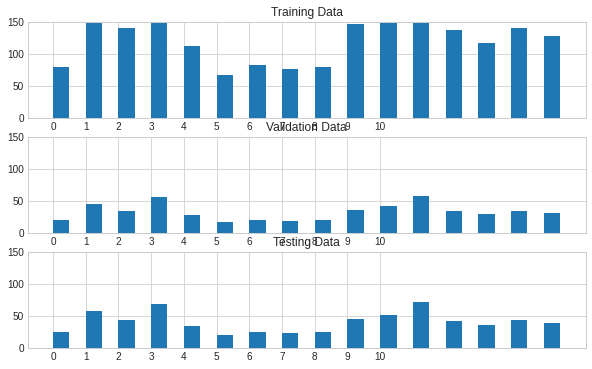

In [42]:
plt.figure(figsize=(10, 6))

plt.subplot(311)
plt.hist(train_y, bins=np.arange(0, 16, 0.5))
plt.ylim(0, 150)
plt.xticks(np.arange(0 , 11, 1))
plt.title('Training Data')

plt.subplot(312)
plt.hist(valid_y, bins=np.arange(0, 16, 0.5))
plt.ylim(0, 150)
plt.xticks(np.arange(0 , 11, 1))
plt.title('Validation Data')

plt.subplot(313)
plt.hist(test_y, bins=np.arange(0, 16, 0.5))
plt.ylim(0, 150)
plt.xticks(np.arange(0 , 11, 1))
plt.title('Testing Data')
plt.show()

>>>### 분류기 모형

In [43]:
"""분류기 모형 설정"""

"""DNN"""
'''Neural Network을 위한 딥러닝 모듈'''
import torch             # 딥러닝 모듈이고, 로컬에서는  설치필요
import copy
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

''' 결과 평가용 모듈 '''
from sklearn.metrics import accuracy_score, confusion_matrix
    
''' 기타 optional'''
import warnings, itertools
warnings.filterwarnings(action='ignore')


#https://colab.research.google.com/drive/1kt8Zmy-qiE4mhcgBrFUAzdBmVh9UVyGK#scrollTo=1ed897f1
train_x_torch = torch.FloatTensor(train_x.values) # torch.FloatTensor(numpy)
train_y_torch = torch.LongTensor(train_y.values) # torch.LongTensor(numpy)
trainDataset = torch.utils.data.TensorDataset(train_x_torch, train_y_torch)
trainLoader = torch.utils.data.DataLoader(dataset = trainDataset,
                                         batch_size = 100,
                                         shuffle = True)

# 검증에는 shuffle 하지 않음.  w 찾는게 아님.
valid_x_torch = torch.FloatTensor(valid_x.values) # torch.FloatTensor(numpy)
valid_y_torch = torch.LongTensor(valid_y.values) # torch.LongTensor(numpy)
validDataset = torch.utils.data.TensorDataset(valid_x_torch, valid_y_torch)
validLoader = torch.utils.data.DataLoader(dataset = validDataset,
                                        batch_size = 100,
                                        shuffle = False)

test_x_torch = torch.FloatTensor(test_x.values) # torch.FloatTensor(numpy)
test_y_torch = torch.LongTensor(test_y.values) # torch.LongTensor(numpy)
testDataset = torch.utils.data.TensorDataset(test_x_torch, test_y_torch)
testLoader = torch.utils.data.DataLoader(dataset = testDataset,
                                        batch_size = 100,
                                        shuffle = False)

In [44]:
# 모형
class DNNClassifier(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):    # 모델 구조 정의
        # input_dim = 784, output_dim = 10 (클래스 개수)
        super().__init__()
        
        ''' 모델 구조 만들기'''
        # CNN, RNN, LSTM등은 linear가 아니다.
        self.linear1 = torch.nn.Linear(input_dim, hidden_dim1) # input_dim(784) -> hidden_dim1(500)
        self.linear2 = torch.nn.Linear(hidden_dim1, hidden_dim2) # hidden_dim1(500) -> hidden_dim2(300)
        self.linear3 = torch.nn.Linear(hidden_dim2, hidden_dim3) # hidden_dim2(300) -> hidden_dim3(100)
        self.linear4 = torch.nn.Linear(hidden_dim3, output_dim) # hidden_dim3(100) -> output_dim(10)
        
        self.relu = torch.nn.ReLU() # Relu activation function
        self.dropout = torch.nn.Dropout(p=0.5)     # p = 0.5는 확률개념으로 50% 는 w 를 업데이트 하지 않음. overfit 방지
        
    def forward(self, x):                                                                # 순서, Sequence 정의
        
        ''' 짜여진 모델에 설명 변수 데이터 x를 입력할 때 진행할 순서 설정'''

        x = self.linear1(x) 
        x = self.relu(x) 
        x = self.linear2(x)
        x = self.relu(x)
        x = self.dropout(x)     # 반절만 활성화
        x = self.linear3(x)
        x = self.relu(x)
        output = self.linear4(x) 
        
        return output

In [45]:
#모델 및 비용함수, Solver 설정
print(train_x.shape[1],train_y.nunique())

52 16


In [46]:
# 빈 모델 생성
clf_DNN = DNNClassifier(train_x.shape[1], 500, 300, 100, train_y.nunique())  # features개수, Hidden Layer1, Hidden Layer2, Hidden Layer3, class 개수

In [47]:
# 비용함수 정의
criterion = torch.nn.CrossEntropyLoss()

# Solver 설정
# 경사하강법의 종류 정의 (adam)
solver = torch.optim.Adam(clf_DNN.parameters(), lr = 0.001)

>>>### 훈련 / 검증

In [48]:
num_epochs = 100

print("Start Training !")
print('-'*50)

# 빈 공간 할당
train_loss_total = []
valid_loss_total = []
best_loss = np.inf


# 
for epoch in range(num_epochs):
    #초기값  
    train_loss = 0
    valid_loss = 0
    
    ''' Training '''
    clf_DNN.train()
    for x_data, y_data in trainLoader:          # trainLoader로 구성해놨던 데이터 가져옴.
        
        # 정확한 학습을 위하여 모든 기울기 값을 0으로 설정
        solver.zero_grad()
        
        y_pred = clf_DNN(x_data)
        
        # 비용함수를 활용하여 오차 계산
        loss = criterion(y_pred, y_data)
        
        # 계산된 오차를 기반으로, 오차를 줄일 수 있는 방향으로 w값 업데이트  (즉, backpropagation !)
        loss.backward()
        solver.step() # forward evaluation, backward propagation, update를 모두 포함하는 step

        train_loss += loss.item()
    
    ''' Validation '''
    clf_DNN.eval()
    for eval_x_data, eval_y_data in validLoader:
        eval_y_pred = clf_DNN(eval_x_data)
        valid_loss += criterion(eval_y_pred, eval_y_data).item() # 딕셔너리에 있는 키와 값들의 쌍을 얻어 저장



    """ 결과출력"""    
    print('[%d epoch] Train loss : %.3f, Valid loss : %.3f' % (epoch+1, train_loss/len(trainLoader), valid_loss/len(validLoader)))
    
    if valid_loss/len(validLoader) < best_loss:
        # 로스값 업데이트
        best_loss = valid_loss/len(validLoader)        # validation loss 값이 점점줄다가 다시커지게 되므로 가장적었을때의 epoch와 파라미터 w를 기억해둔다.
        # 최적의 epoch 수와 모델 저장하기
        best_epoch = epoch
        best_model = clf_DNN.state_dict()
    
    train_loss_total.append(train_loss/len(trainLoader))
    valid_loss_total.append(valid_loss/len(validLoader))
    
print('-'*50)
print("Finished Training ! Best Epoch is epoch %d." % (best_epoch+1))

Start Training !
--------------------------------------------------
[1 epoch] Train loss : 2.227, Valid loss : 1.402
[2 epoch] Train loss : 1.009, Valid loss : 0.549
[3 epoch] Train loss : 0.477, Valid loss : 0.349
[4 epoch] Train loss : 0.278, Valid loss : 0.208
[5 epoch] Train loss : 0.198, Valid loss : 0.168
[6 epoch] Train loss : 0.173, Valid loss : 0.138
[7 epoch] Train loss : 0.120, Valid loss : 0.129
[8 epoch] Train loss : 0.109, Valid loss : 0.107
[9 epoch] Train loss : 0.087, Valid loss : 0.104
[10 epoch] Train loss : 0.077, Valid loss : 0.089
[11 epoch] Train loss : 0.067, Valid loss : 0.087
[12 epoch] Train loss : 0.049, Valid loss : 0.090
[13 epoch] Train loss : 0.046, Valid loss : 0.077
[14 epoch] Train loss : 0.040, Valid loss : 0.072
[15 epoch] Train loss : 0.036, Valid loss : 0.073
[16 epoch] Train loss : 0.029, Valid loss : 0.072
[17 epoch] Train loss : 0.022, Valid loss : 0.057
[18 epoch] Train loss : 0.022, Valid loss : 0.065
[19 epoch] Train loss : 0.017, Valid loss

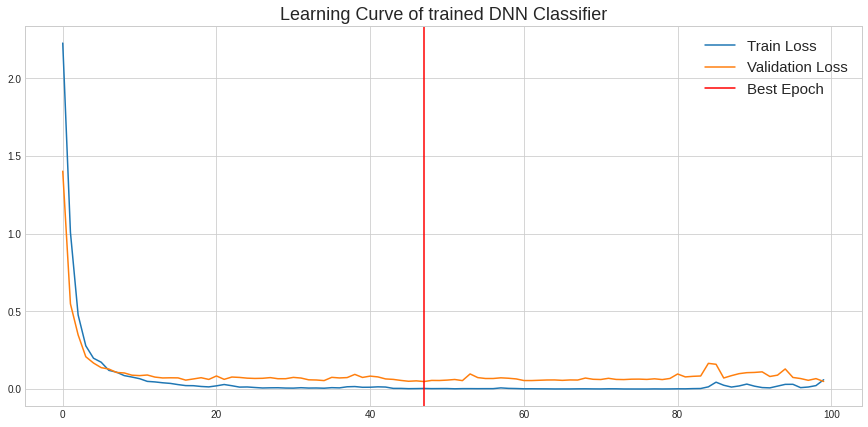

In [49]:
# learning Curve
plt.figure(figsize=(15,7))

# 학습 및 검증 로스 변동 관찰하기
plt.plot(train_loss_total,label='Train Loss')
plt.plot(valid_loss_total, label='Validation Loss')
# 최적의 모델이 저장된 곳 표시
plt.axvline(x = best_epoch, color='red', label='Best Epoch')    # axv 는 수직선 그리기
plt.legend(fontsize=15)
plt.title("Learning Curve of trained DNN Classifier", fontsize=18)
plt.show()

# 빨간선왼쪽, underfit, 오르쪽은 overfit
# 주관적으로 약간 왼쪽 또는 오른쪽으로 볼수 있음.

In [50]:
"""1차 평가 /w test_set"""
# DNN 성능평가
# 최적의 모델 불러오기
best_clf_DNN = DNNClassifier(train_x.shape[1], 500, 300, 100, 16)
best_clf_DNN.load_state_dict(best_model)

<All keys matched successfully>

In [51]:
# model을 evaluation 모드로 변경
best_clf_DNN.eval()

DNNClassifier(
  (linear1): Linear(in_features=52, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=300, bias=True)
  (linear3): Linear(in_features=300, out_features=100, bias=True)
  (linear4): Linear(in_features=100, out_features=16, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)

In [52]:
# clf_mlp(data) == data -> logit -> probability=softmax(logit)
y_train_prob = best_clf_DNN(train_x_torch).softmax(dim=1)

# 가장 큰 확률값에 해당하는 범주를 예측 범주로 저장
y_train_pred = y_train_prob.max(1)[1].numpy()

In [53]:
y_train_prob[0].detach().numpy().tolist()

[1.0383714721395876e-10,
 1.0,
 7.031744964081099e-09,
 2.244549049390792e-14,
 3.741704140830315e-24,
 7.436458396897995e-20,
 6.590925138993953e-09,
 4.991746165722288e-12,
 5.541602333264395e-12,
 5.6610002838566095e-15,
 1.520115627802381e-20,
 2.838438595276216e-09,
 2.827428588703324e-15,
 1.8431421971317181e-25,
 3.102125143388883e-23,
 8.179267934226711e-26]

In [54]:
y_train_pred[0]

1

In [55]:
train_y.head(1)

2024    1
dtype: int64

In [56]:
train_accuracy = accuracy_score(y_pred=y_train_pred,y_true=train_y)

print(f"훈련 데이터셋 정확도: {train_accuracy:.3f}")

훈련 데이터셋 정확도: 1.000


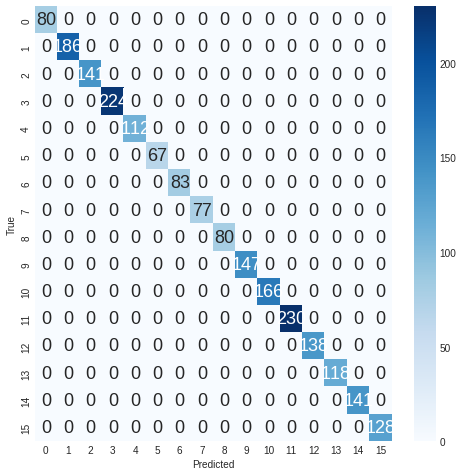

In [57]:
cm_train = confusion_matrix(y_true=train_y, y_pred=y_train_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(data=cm_train, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [58]:
"""학습된 DNN Classifier 결과 확인 및 성능 평가 : Validation Data"""
y_valid_prob = best_clf_DNN(valid_x_torch).softmax(dim=1)
y_valid_pred = y_valid_prob.max(1)[1].numpy()
valid_accuracy = accuracy_score(y_pred=y_valid_pred,y_true=valid_y)

print(f"검증용 데이터셋 정확도: {valid_accuracy:.3f}")


검증용 데이터셋 정확도: 0.987


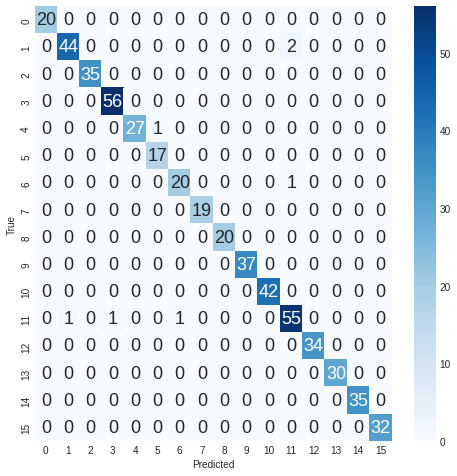

In [59]:
cm_valid = confusion_matrix(y_true=valid_y, y_pred=y_valid_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(data=cm_valid, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [60]:
"""성능평가 : Testing Data"""
y_test_prob = best_clf_DNN(test_x_torch).softmax(dim=1)
y_test_pred = y_test_prob.max(1)[1].numpy()
Acc_DNN = accuracy_score(y_pred=y_test_pred,y_true=test_y)

print(f"테스트용 데이터셋 정확도: {Acc_DNN:.3f}")

테스트용 데이터셋 정확도: 0.983


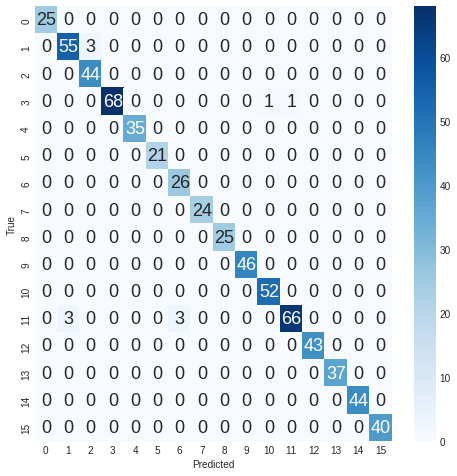

In [61]:
cm_test = confusion_matrix(y_true=test_y, y_pred=y_test_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

>>## MLP
- <b>activation</b> - activation function 타입 (identity, logistic, tanh, <font color='red'>relu</font>) <br>
- <b>batch_size</b> - stochastic optimizer가 사용할 minibatch 크기 <br>
- <b>max_iter  </b> - stochastic optimizer의 최대 iteration 횟수 ( = Epochs )<br>
- <b>alpha     </b> - Learning Rate (과적합 방지용) <br>
- <b>solver    </b> - 경사하강법의 종류 (<font color='red'>adam</font>, sgd, lbfgs) <br>

-- lbfgs: L-BFGS 준-뉴턴 방식 의 최적화 알고리즘으로, 제한된 컴퓨터 메모리를 이용하여 기존 BFGS 알고리즘을 속도면에서 개선한 알고리즘

In [62]:
''' Neural Network Classifier(분류기) 모듈 '''
from sklearn.neural_network import MLPClassifier    # MultiLayerPerceptrion

''' 결과 평가용 모듈 '''
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score   # 분류
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error       # 예측

>>>### 분류기 모형

In [63]:
"""분류기 모형 설정"""
clf_mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size=10,        # 몇 개의 data를 보고 학습할 것인지. batch_size
                        hidden_layer_sizes=(32), max_iter=500,                 
                        solver='adam', verbose = True, random_state = 2022)

>>>### 훈련 / 검증

In [64]:
"""학습"""
clf_mlp.fit(train_x, train_y)

Iteration 1, loss = 2.20660576
Iteration 2, loss = 1.16145769
Iteration 3, loss = 0.68634626
Iteration 4, loss = 0.46104553
Iteration 5, loss = 0.33883294
Iteration 6, loss = 0.26206429
Iteration 7, loss = 0.20953520
Iteration 8, loss = 0.17532227
Iteration 9, loss = 0.14771370
Iteration 10, loss = 0.12771757
Iteration 11, loss = 0.11228910
Iteration 12, loss = 0.09906222
Iteration 13, loss = 0.08772111
Iteration 14, loss = 0.07847035
Iteration 15, loss = 0.06978720
Iteration 16, loss = 0.06396081
Iteration 17, loss = 0.05793574
Iteration 18, loss = 0.05225703
Iteration 19, loss = 0.04811508
Iteration 20, loss = 0.04389642
Iteration 21, loss = 0.03919903
Iteration 22, loss = 0.03633817
Iteration 23, loss = 0.03320270
Iteration 24, loss = 0.03052298
Iteration 25, loss = 0.02777196
Iteration 26, loss = 0.02627564
Iteration 27, loss = 0.02364857
Iteration 28, loss = 0.02170641
Iteration 29, loss = 0.02006308
Iteration 30, loss = 0.01857003
Iteration 31, loss = 0.01675565
Iteration 32, los

MLPClassifier(batch_size=10, hidden_layer_sizes=32, max_iter=500,
              random_state=2022, verbose=True)

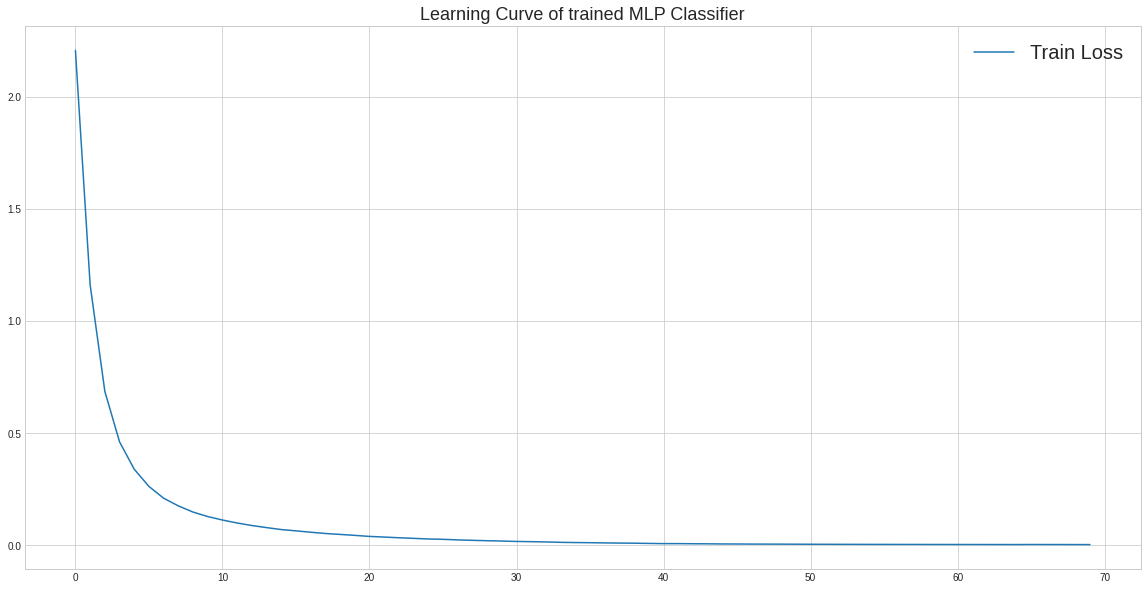

In [65]:
"""1차 평가 /w training_set"""
plt.figure(figsize=(20,10))

train_loss_values = clf_mlp.loss_curve_
plt.plot(train_loss_values,label='Train Loss')

plt.legend(fontsize=20)
plt.title("Learning Curve of trained MLP Classifier", fontsize=18)
plt.show()

In [66]:
train_y_pred = clf_mlp.predict(train_x)

In [67]:
cm_train = confusion_matrix (y_true=train_y, y_pred=train_y_pred)

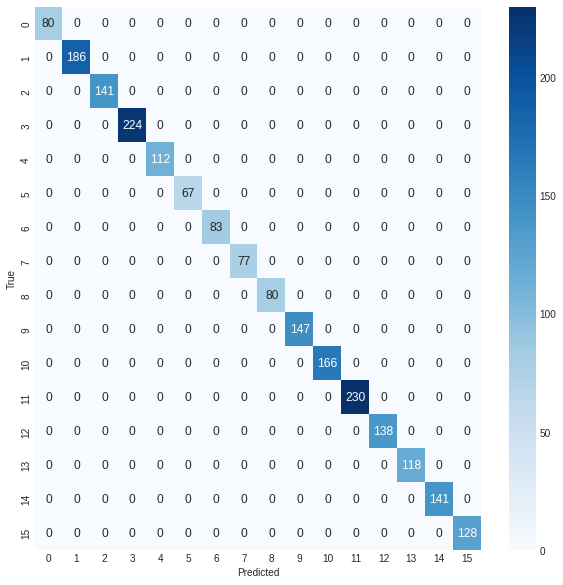

In [68]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=cm_train, annot=True, fmt='d', annot_kws={'size': 12}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

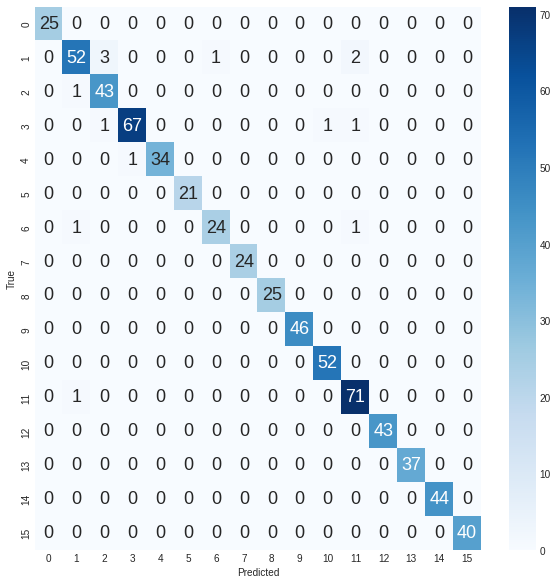

In [69]:
"""2차 평가 /w testing_set"""
test_y_pred = clf_mlp.predict(test_x)

cm_test = confusion_matrix(y_true=test_y, y_pred=test_y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [70]:
test_y_pred_proba = clf_mlp.predict_proba(test_x)
test_y_pred_proba = pd.DataFrame(test_y_pred_proba)
test_y_pred_proba.index = test_y.index.copy()

In [71]:
test_results = pd.concat([test_y_pred_proba, test_y], axis=1)
test_results.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
Acc_MLP = accuracy_score(test_y,test_y_pred)
#test_results.head()

In [72]:
print("정확도 : {:.3f}".format(accuracy_score(test_y,test_y_pred)))
print("오차 행렬 \n",confusion_matrix(test_y,test_y_pred))

print(classification_report(test_y,test_y_pred))

정확도 : 0.979
오차 행렬 
 [[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 52  3  0  0  0  1  0  0  0  0  2  0  0  0  0]
 [ 0  1 43  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 67  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  1 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0 24  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 52  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0 71  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 37  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.95      0.90      0.92        58


>>## Decision Tree
- 최적의 max_depth를 선택해야 함
- Validation을 사용하여 accuracy, F1-Score를 고려하여 선정

In [73]:
"""라이브러리 모형 설정"""

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix     # f1_score 는 극단적 데이터 불균형이 있을경우에 살펴봐야 함.
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [74]:
max_depths = list(range(1, 20)) + [None]
print(max_depths)

# 평가 지표 저장
acc_valid = []
f1_valid = []

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, None]


>>>### 분류기 모형 / 훈련

In [75]:
"""1차 평가 /w training set"""
for max_depth in max_depths:
                      
    # 모델 학습
    model = DecisionTreeClassifier(max_depth=max_depth,random_state=seed_no)
    model.fit(train_x, train_y)
    
    # validation 예측
    y_valid_pred = model.predict(valid_x)
    
    # 모델 평가 결과 저장
    acc = accuracy_score(valid_y, y_valid_pred)
    #f1 = f1_score(valid_y, y_valid_pred,average='macro')
    
    acc_valid.append(acc)   # 덮어씌워지므로 apped
    #f1_valid.append(f1)     # append

In [76]:
# Decision Tree depth list
xticks = list(map(str, max_depths))     # 스트링을 그래프의 문자열로 사용하려면.
print(xticks)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 'None']


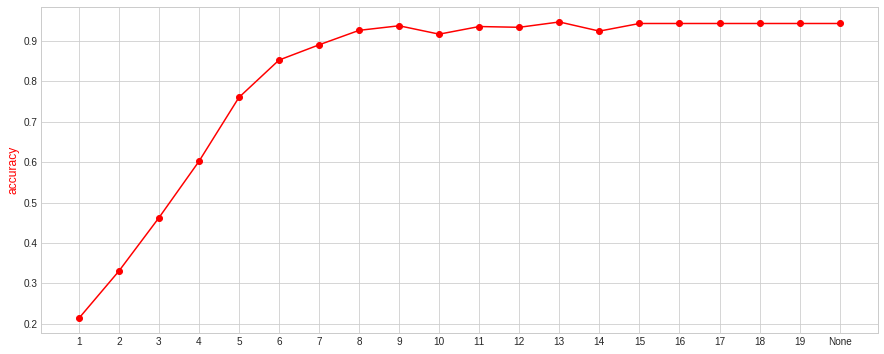

In [77]:
# Decision Tree depth에 따른 accuracy
fig, ax = plt.subplots(figsize=(15, 6))
#fig.subplots_adjust(right=0.75)

ax.plot(range(len(max_depths)), acc_valid, color='red', marker='o')
ax.set_ylabel('accuracy', color='red', fontsize=12)

# ax2 = ax.twinx()
# ax2.plot(range(len(max_depths)), f1_valid, color='blue', marker='s')
# ax2.set_ylabel('f1', color='blue', fontsize=12)

plt.xticks(range(len(max_depths)), xticks)
plt.show()

In [78]:
model = DecisionTreeClassifier(max_depth=8,random_state=seed_no)
model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=8, random_state=2022)

>>>### 검증

In [79]:
"""1차 평가 /w test_set"""
y_test_pred = model.predict(test_x)

# Confusion Matrix
cm = confusion_matrix(test_y, y_test_pred)
cm = pd.DataFrame(cm)

# Accuracy, F1-Score
Acc_TREE = accuracy_score(test_y, y_test_pred)
f1 = f1_score(test_y, y_test_pred, average='macro')

print('- Accuracy (Test) : {:.3}'.format(Acc_TREE))
print('- F1 score (Test) : {:.3}'.format(f1))

- Accuracy (Test) : 0.903
- F1 score (Test) : 0.913


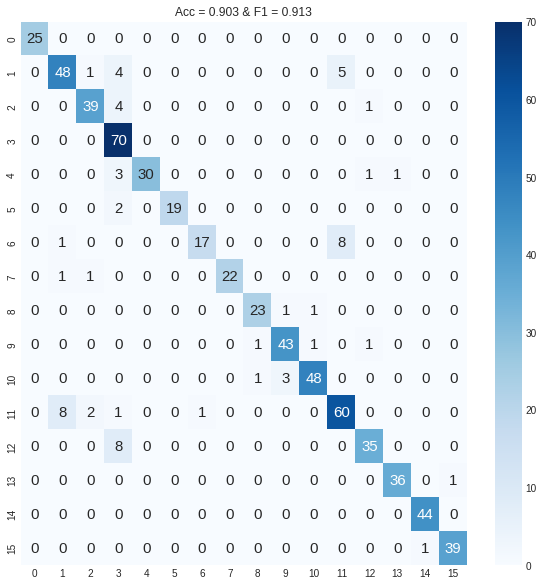

In [80]:
# 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(data=cm, annot=True, annot_kws={'size': 15}, fmt='d', cmap='Blues')
plt.title('Acc = {:.3f} & F1 = {:.3f}'.format(Acc_TREE, f1))
plt.show()

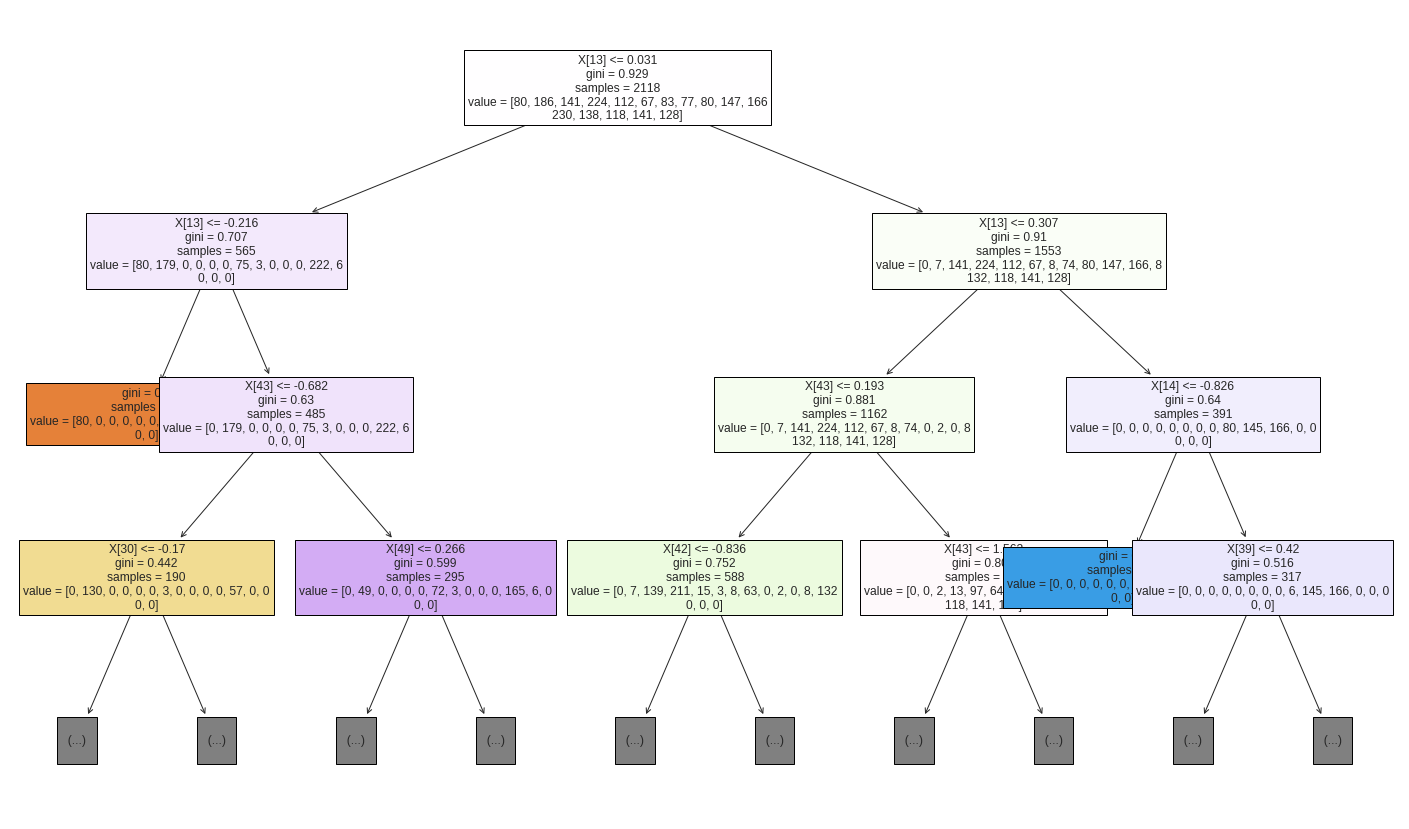

In [81]:
plt.figure(figsize=(25, 15))
plot_tree(decision_tree=model,max_depth=3,feature_names=None,label='all', filled=True,fontsize=12)
plt.show()
# Samples = 3  샘플의 개수
# Values = [2,1]     색상

In [82]:
# 변수 중요도
importances = model.feature_importances_

# 내림차순으로 정렬하기 위한 index
index = np.argsort(importances)[::-1]

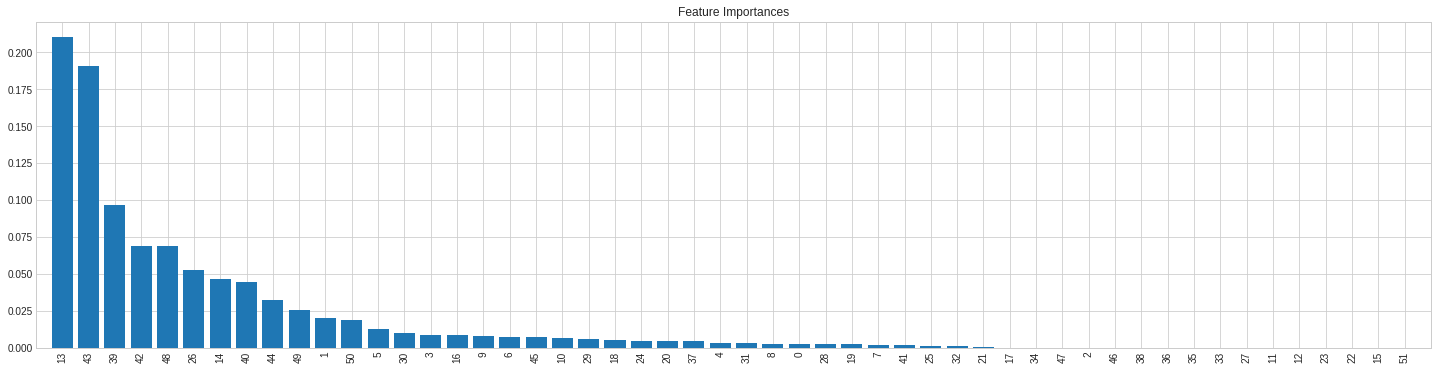

In [83]:
plt.figure(figsize=(25, 6))
plt.title('Feature Importances')
plt.bar(range(x.shape[1]),
        importances[index],
        align='center')
plt.xticks(range(x.shape[1]), x.columns[index], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

>>## KNN
grid search의 대상이 되는 파라미터
- n_neighbors: 근접이웃 개수
- weights: weight for voting
- metric: 거리 계산 방법

In [84]:
""" 모델 생성, 학습, 평가 """
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix    # 평가법은 acc,f1,confusion matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import VALID_METRICS
from sklearn.metrics import SCORERS

# parameter grid 지정                 5-fold / 10-fold 주로 사용
# dictioanry 안의 list 형태로 넣어서 구성

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['cosine', 'euclidean', 'manhattan']
}

>>>### 분류기 모형 / 훈련

In [85]:
""" Grid Search CV 모델 구성: cv = 10 """

SCORERS.keys()
model = KNeighborsClassifier()
model_cv = GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1)  # 모든것을 고려하겠다...

                        
model_cv.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['cosine', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [86]:
results = model_cv.cv_results_
params = results['params']
mean_score = results['mean_test_score']
std_score =results['std_test_score']

In [87]:
params = ['_'.join(str(x) for x in param.values()) for param in params]
params[:5]

['cosine_1_uniform',
 'cosine_1_distance',
 'cosine_3_uniform',
 'cosine_3_distance',
 'cosine_5_uniform']

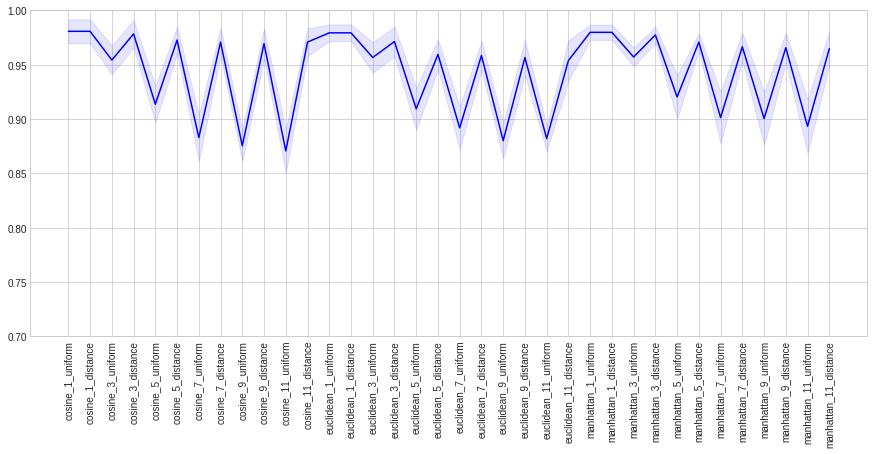

In [88]:
plt.figure(figsize=(15, 6))
plt.fill_between(range(len(params)), mean_score - std_score, mean_score + std_score, alpha=0.1, color='blue')
plt.plot(range(len(params)), mean_score, color='blue')
plt.ylim([0.7, 1.0])
plt.xticks(range(len(params)), params, rotation=90)
plt.show()

In [89]:
# Best parameter 출력
print('Best parameters (Grid Search) \n >> ', model_cv.best_params_)

Best parameters (Grid Search) 
 >>  {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}


In [90]:
# Best 모델 찾기
model = model_cv.best_estimator_
model                                         # weight default와 같아서 안보임.

KNeighborsClassifier(metric='cosine', n_neighbors=1)

>>>### 검증

In [91]:
# 에측 결과 산출
y_test_pred = model.predict(test_x)

# Confusion Matrix
cm = confusion_matrix(test_y, y_test_pred)
cm = pd.DataFrame(cm)

# Accuracy, F1-Score
Acc_KNN = accuracy_score(test_y, y_test_pred)
f1 = f1_score(test_y, y_test_pred,average='macro')

print('- Accuracy (Test) : {:.3}'.format(Acc_KNN))
print('- F1 score (Test) : {:.3}'.format(f1))

- Accuracy (Test) : 0.985
- F1 score (Test) : 0.986


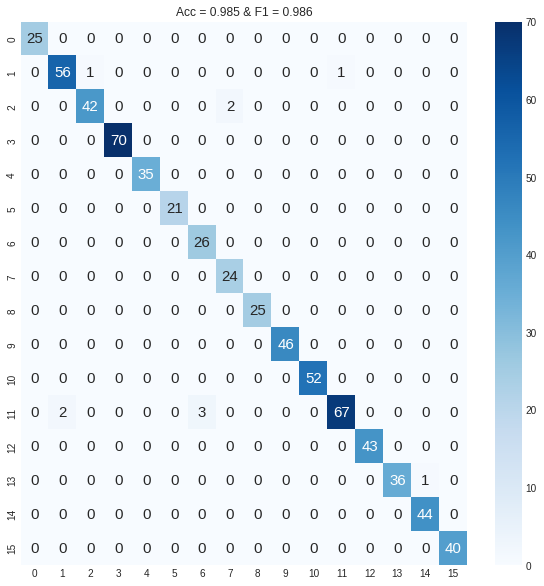

In [92]:
# 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(data=cm, annot=True, annot_kws={'size': 15}, fmt='d', cmap='Blues')
plt.title('Acc = {:.3f} & F1 = {:.3f}'.format(Acc_KNN, f1))
plt.show()

>>## **Ensemble(AdaBoost)**

>>>### 분류기 모형 / 훈련

In [93]:
from sklearn.ensemble import AdaBoostClassifier

params = {"n_estimators" : [100, 200, 400], "learning_rate" : [0.01, 0.5, 1.0]}

# model define
model_Ada = AdaBoostClassifier(random_state=seed_no)

# model train with gridsearchCV    # CV = CrossValidation    5개의 데이터셑으로 분할하고, 4번 훈련, 1번 test 수행 
grid_model_Ada = GridSearchCV(model_Ada, param_grid = params, cv = 5, refit = True, return_train_score= True)
grid_model_Ada.fit(train_x, train_y)

# print results
result = pd.DataFrame(grid_model_Ada.cv_results_)
best_model_Ada = grid_model_Ada.best_estimator_

In [94]:
print("CV score")

# DataFrame으로 만든 result중에 일부 컬럼만 출력함 
result[["params"] + ["split" + str(i) + "_test_score" for i in range(5)] + ["std_test_score", "mean_test_score"]]

CV score


,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_test_score,mean_test_score
0,"{'learning_rate': 0.01, 'n_estimators': 100}",0.337264,0.351415,0.408019,0.352246,0.413712,0.031800,0.372531
1,"{'learning_rate': 0.01, 'n_estimators': 200}",0.400943,0.405660,0.448113,0.392435,0.432624,0.020960,0.415955
2,"{'learning_rate': 0.01, 'n_estimators': 400}",0.386792,0.386792,0.436321,0.385343,0.392435,0.019544,0.397537
3,"{'learning_rate': 0.5, 'n_estimators': 100}",0.551887,0.580189,0.514151,0.498818,0.574468,0.032350,0.543902
4,"{'learning_rate': 0.5, 'n_estimators': 200}",0.566038,0.655660,0.608491,0.579196,0.624113,0.031979,0.606700
5,"{'learning_rate': 0.5, 'n_estimators': 400}",0.683962,0.709906,0.679245,0.680851,0.709220,0.013905,0.692637
6,"{'learning_rate': 1.0, 'n_estimators': 100}",0.327830,0.325472,0.325472,0.330969,0.326241,0.002074,0.327197
7,"{'learning_rate': 1.0, 'n_estimators': 200}",0.327830,0.325472,0.325472,0.330969,0.326241,0.002074,0.327197
8,"{'learning_rate': 1.0, 'n_estimators': 400}",0.327830,0.325472,0.325472,0.330969,0.326241,0.002074,0.327197


>>>### 검증

In [95]:
print("Adaboost")
print("Best Parameter : " + str(grid_model_Ada.best_params_))

# predict
pred = best_model_Ada.predict(test_x)

# pandas의 cross table  --> heatmap과 같아, accuracy 산정 활용
tab = pd.crosstab(test_y, pred, rownames = ["real"], colnames = ["pred"])
print(tab)

# Acc 계산/출력
hit_count=0

for i in range(pd.Series(pred).nunique()):
  hit_count = hit_count + tab.iloc[i,i]

Acc_Ensemble =  hit_count / len(test_x)

print("Acc : " + str( Acc_Ensemble))      


Adaboost
Best Parameter : {'learning_rate': 0.5, 'n_estimators': 400}
pred  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15
real                                                                
0     25   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
1      0  33   4   0   0   0   1   0   0   0   0  20   0   0   0   0
2      0   0  34  10   0   0   0   0   0   0   0   0   0   0   0   0
3      0   0   0  66   0   0   0   0   0   0   0   0   4   0   0   0
4      0   0   0   7  25   0   0   0   0   0   0   0   3   0   0   0
5      0   0   0   0   0  21   0   0   0   0   0   0   0   0   0   0
6      0   0   0   0   0   0   4   0   0   0   0  22   0   0   0   0
7      0   0   0   5   0   0   0  19   0   0   0   0   0   0   0   0
8      0   0   0   0   0   0   0   0  21   3   1   0   0   0   0   0
9      0   0   0   0   0   0   0   0   0  39   7   0   0   0   0   0
10     0   0   0   0   0   0   0   0   0  10  42   0   0   0   0   0
11     0   5   0   0   0   0   6 

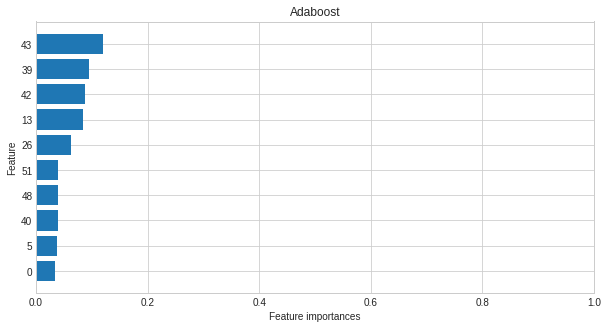

In [96]:
# visualie the feature importance

plt.figure(figsize = (10, 5))

plt.title("Adaboost")
fi = best_model_Ada.feature_importances_
idx = (-fi).argsort()[0:10]
fi = fi[idx]
idx = train_x.columns[idx]
plt.barh(range(10), fi[::-1], align='center')
plt.xlim(0, 1)
plt.yticks(range(10), idx[::-1])
plt.xlabel('Feature importances', size=10)
plt.ylabel('Feature', size=10)

plt.show() 

>>## **Ensemble(RandomForest)**

In [97]:
from sklearn.ensemble import RandomForestClassifier   # RandomForestRegressor

params = {"n_estimators" : [5, 10, 20]}


>>>### 분류기 모형 / 훈련

In [98]:
#define model
clf = RandomForestClassifier(max_depth=8,random_state=seed_no) # 모델 정의


# model train with gridsearchCV    # CV = CrossValidation    5개의 데이터셑으로 분할하고, 4번 훈련, 1번 test 수행 
grid_model_Bag = GridSearchCV(clf, param_grid = params, cv = 5, refit = True, return_train_score= True)

#train model
grid_model_Bag.fit(train_x, train_y)

# print results
result = pd.DataFrame(grid_model_Bag.cv_results_)
best_model_Bag = grid_model_Bag.best_estimator_

In [99]:
print("CV score")

# DataFrame으로 만든 result중에 일부 컬럼만 출력함 
result[["params"] + ["split" + str(i) + "_test_score" for i in range(5)] + ["std_test_score", "mean_test_score"]]

CV score


,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_test_score,mean_test_score
0,{'n_estimators': 5},0.886792,0.905660,0.891509,0.874704,0.884161,0.010155,0.888566
1,{'n_estimators': 10},0.943396,0.943396,0.922170,0.919622,0.940898,0.010685,0.933896
2,{'n_estimators': 20},0.938679,0.955189,0.955189,0.940898,0.947991,0.006926,0.947589


>>>### 검증

In [100]:
# predict
pred = best_model_Bag.predict(test_x)

# pandas의 cross table  --> heatmap과 같아, accuracy 산정 활용
tab = pd.crosstab(test_y, pred, rownames = ["real"], colnames = ["pred"])
print(tab)

# Acc 계산/출력
hit_count=0

for i in range(pd.Series(pred).nunique()):
  hit_count = hit_count + tab.iloc[i,i]

Acc_RForest =  hit_count / len(test_x)

print("Acc : " + str( Acc_RForest))  

pred  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15
real                                                                
0     25   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
1      0  46   5   0   0   0   0   0   0   0   0   7   0   0   0   0
2      0   0  43   1   0   0   0   0   0   0   0   0   0   0   0   0
3      0   0   0  68   1   0   0   0   0   0   0   0   1   0   0   0
4      0   0   0   1  34   0   0   0   0   0   0   0   0   0   0   0
5      0   0   0   0   0  21   0   0   0   0   0   0   0   0   0   0
6      0   0   0   0   0   0  11   0   0   0   0  15   0   0   0   0
7      0   1   0   0   0   0   0  23   0   0   0   0   0   0   0   0
8      0   0   0   0   0   0   0   0  25   0   0   0   0   0   0   0
9      0   0   0   0   0   0   0   0   0  46   0   0   0   0   0   0
10     0   0   0   0   0   0   0   0   0   1  51   0   0   0   0   0
11     0   2   2   0   0   0   0   1   0   0   0  67   0   0   0   0
12     0   0   0   4   0   0   0  

# **결과**
---
>Data Augmentation 유/무, a모형별, 별도 검증 데이터 기반 Accuracy 비교

In [101]:
"""Data Augmentation 유/무, 모형별, Accuracy 비교"""
print(f"DNN: {Acc_DNN:.3f}, MLP:{Acc_MLP:.3f}, DTree:{Acc_TREE:.3f}, KNN:{Acc_KNN:.3f}, AdaBoost: {Acc_Ensemble:.3f}, RandomForest: {Acc_RForest:.3f}")

# No Data Augmentation
# DNN: 0.872, MLP:0.842, DTree:0.744, KNN:0.789, AdaBoost: 0.556, RandomForest: 0.872

# Data Augmentation
# DNN: 0.882, MLP:0.882, DTree:0.729, KNN:0.857, AdaBoost: 0.490, RandomForest: 0.862  (jittering sigma = 0.05,  MagWarp = 0.2)
# DNN: 0.977, MLP:0.967, DTree:0.854, KNN:0.960, AdaBoost: 0.686, RandomForest: 0.950  (jittering sigma = 0.005, MagWarp = 0.2)
# DNN: 0.975, MLP:0.967, DTree:0.859, KNN:0.960, AdaBoost: 0.704, RandomForest: 0.975  (jittering sigma = 0.005, MagWarp = 0.05)
# DNN: 0.992, MLP:0.987, DTree:0.900, KNN:0.985, AdaBoost: 0.666, RandomForest: 0.958  (jittering sigma = 0.005, MagWarp = 0.05, Scaling = 0.1)
# DNN: 0.985, MLP:0.979, DTree:0.903, KNN:0.985, AdaBoost: 0.745, RandomForest: 0.937  (jittering sigma = 0.005, MagWarp = 0.05, Scaling = 0.025, Combination = (0.1,0.01))



DNN: 0.983, MLP:0.979, DTree:0.903, KNN:0.985, AdaBoost: 0.745, RandomForest: 0.937
